In [2]:
import fiona

In [6]:
#Dataset accessed from https://www.diva-gis.org/datadown which are the railroads of Austria
# Open the shapefile using Fiona
with fiona.open("AUT_rails.shp", "r") as shapefile:
    # Print the name and geometry of each feature in the shapefile
    for feature in shapefile:
        print(feature["properties"])
        print(feature["geometry"])

OrderedDict([('FID_rail_d', 55043), ('F_CODE_DES', 'Railroad'), ('EXS_DESCRI', 'Operational'), ('FCO_DESCRI', 'Single'), ('FID_countr', 16), ('ISO', 'AUT'), ('ISOCOUNTRY', 'AUSTRIA')])
{'type': 'LineString', 'coordinates': [(15.043611491999997, 48.94086072447339), (15.036777440999996, 48.93355568547339), (15.038916542999997, 48.92972182047339), (15.040666493999996, 48.90958405947339), (15.036639281999996, 48.90436180047339), (15.036194753999997, 48.89566798947339), (15.030471833999997, 48.88622290347339), (15.021972692999997, 48.875556877473386), (15.015250151999997, 48.872860036473384), (15.013833029999997, 48.870666502473384), (15.017333120999997, 48.864639292473385), (15.016249583999997, 48.862445758473385), (15.010749872999996, 48.858722647473385), (15.002805635999996, 48.85699840047339), (14.999999930999996, 48.855094981473385), (14.994309518999996, 48.85123068747339)]}
OrderedDict([('FID_rail_d', 55073), ('F_CODE_DES', 'Railroad'), ('EXS_DESCRI', 'Operational'), ('FCO_DESCRI', 'S

Geopandas

   FID_rail_d F_CODE_DES             EXS_DESCRI FCO_DESCRI  FID_countr  ISO  \
0       55043   Railroad            Operational     Single          16  AUT   
1       55073   Railroad            Operational     Single          16  AUT   
2       55317   Railroad            Operational     Single          16  AUT   
3       55687   Railroad  Unexamined/Unsurveyed    Unknown          16  AUT   
4       55711   Railroad            Operational     Single          16  AUT   

  ISOCOUNTRY                                           geometry  
0    AUSTRIA  LINESTRING (15.04361 48.94086, 15.03678 48.933...  
1    AUSTRIA  LINESTRING (14.99431 48.85123, 15.00000 48.850...  
2    AUSTRIA  LINESTRING (14.99431 48.85123, 14.99181 48.849...  
3    AUSTRIA  LINESTRING (14.98442 48.77952, 14.98494 48.78045)  
4    AUSTRIA  LINESTRING (14.99054 48.76626, 14.99178 48.765...  


<AxesSubplot:>

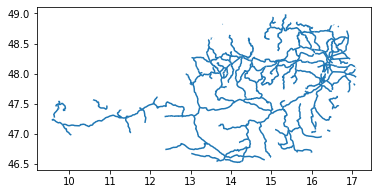

In [7]:
import geopandas as gpd

# Load shapefile as GeoDataFrame
gdf = gpd.read_file("AUT_rails.shp")

# Print the first five rows of the GeoDataFrame
print(gdf.head())

# Plot the GeoDataFrame
gdf.plot()

Shapely

In [8]:
from shapely.geometry import Point, LineString, Polygon

# Create a Point object
point1 = Point(0, 0)

# Create another Point object
point2 = Point(4, 4)

# Create a LineString object
line = LineString([(0, 0), (1, 1), (2, 2), (4, 4)])

# Check if the line intersects with the point
print(line.intersects(point1))
print(line.intersects(point2))

# Create a Polygon object
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])

# Check if the point is inside the polygon
print(polygon.contains(point1))
print(polygon.contains(point2))

True
True
False
False


Rasterio

In [6]:
!pip3 install rasterio

D:\ProgramFiles\anaconda3\lib\site-packages\rasterio\__init__.py:334: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1280, 'height': 853, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


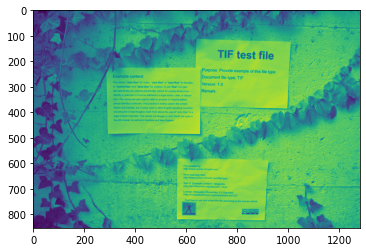

In [9]:
#https://www.online-convert.com/file-format/tif

import rasterio
import matplotlib.pyplot as plt

# Open the raster file in read mode
with rasterio.open('example.tif') as src:
    # Print the raster metadata
    print(src.meta)

    # Read the first band of the raster
    band1 = src.read(1)

    # Plot the raster using matplotlib
    plt.imshow(band1)
    plt.show()

Pyproj

In [12]:
import pyproj as proj 

# Initialize the CRS object from EPSG code 
crs = proj.CRS.from_epsg(4326) 

# Convert CRS to a different format 
crs_bng = proj.Proj(init='epsg:27700') 

crs_wgs = proj.Proj(init='epsg:4326')

# Transform the geographic coordinate pair to the projected system 
x, y = proj.transform(crs_wgs, crs_bng, s['gps_lng'], s['gps_lat']) [3][2] 

# Generate a custom projection 
crs_custom = proj.Proj(init='custom: +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')


D:\ProgramFiles\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
D:\ProgramFiles\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


NameError: name 's' is not defined

In [10]:
import pyproj

# Define the input and output coordinate systems
in_proj = pyproj.Proj(init='epsg:4326')   # WGS84 (standard lat/long)
out_proj = pyproj.Proj(init='epsg:26915') # UTM Zone 15N

# Define a point in the input coordinate system
x, y = -73.9857, 40.7484

# Convert the point to the output coordinate system
x_out, y_out = pyproj.transform(in_proj, out_proj, x, y)

# Print the output coordinates
print(f"Output coordinates: {x_out}, {y_out}")

D:\ProgramFiles\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
D:\ProgramFiles\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Output coordinates: 2109179.3873605104, 4688651.3110369155


C:\Users\ABHIROCKZZZ\AppData\Local\Temp\ipykernel_15452\3257504113.py:11: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_out, y_out = pyproj.transform(in_proj, out_proj, x, y)


Cartopy

In [28]:
!conda install -c conda-forge cartopy

^C


In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure and add an axis with a Plate Carree projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add coastlines to the map
ax.coastlines()

# Set the extent of the map to the whole world
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Add a title to the map
ax.set_title('Map of the World')

# Display the map
plt.show()

ModuleNotFoundError: No module named 'cartopy'

Folium

In [3]:
!pip3 install folium

In [13]:
import folium

# create a map centered on a specific location
map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# add a marker to the map
folium.Marker(location=[37.7749, -122.4194], popup='San Francisco').add_to(map)

# add a circle to the map
folium.Circle(location=[37.7749, -122.4194], radius=500, fill=True).add_to(map)

# add a polygon to the map
folium.Polygon(locations=[[(37.7749, -122.4194), (37.7749, -122.4074), (37.7669, -122.4074), (37.7669, -122.4194)]],
               fill=True).add_to(map)

# display the map
map

Geopy

In [5]:
!pip3 install Geopy

In [14]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="my_app")

location1 = geolocator.geocode("New York City")
location2 = geolocator.geocode("San Francisco")

distance = geodesic((location1.latitude, location1.longitude), (location2.latitude, location2.longitude)).miles

print("The distance between {} and {} is {} miles.".format(location1.address, location2.address, round(distance, 2)))

The distance between City of New York, New York, United States and San Francisco, CAL Fire Northern Region, California, United States is 2571.87 miles.


descartes

In [7]:
!pip3 install descartes

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

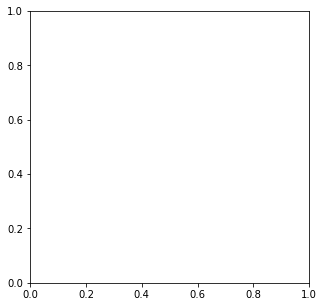

In [20]:
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Polygon

# create a sample polygon
coords = [(0, 0), (1, 0), (1, 1), (0, 1)]
poly = Polygon(coords)

# create figure and axes
fig, ax = plt.subplots(figsize=(5,5))

# create a patch from the polygon and add it to the axes
patch = PolygonPatch(poly, facecolor='blue', alpha=0.5)
ax.add_patch(patch)

# set the x and y limits of the plot
x_min, y_min, x_max, y_max = poly.bounds
ax.set_xlim(x_min - 0.5, x_max + 0.5)
ax.set_ylim(y_min - 0.5, y_max + 0.5)

# display the plot
plt.show()


PySAL

In [12]:
!pip3 install pysal

  Using cached pysal-23.1-py3-none-any.whl (17 kB)
  Using cached pointpats-2.2.0-py3-none-any.whl
  Using cached mgwr-2.1.2-py3-none-any.whl
  Using cached spopt-0.5.0-py3-none-any.whl (112 kB)
  Using cached access-1.1.8-py3-none-any.whl (21 kB)
  Using cached giddy-2.3.3-py3-none-any.whl (60 kB)
  Using cached segregation-2.3.1-py3-none-any.whl (147 kB)
  Using cached momepy-0.5.4-py3-none-any.whl (243 kB)
  Using cached spvcm-0.3.0-py3-none-any.whl
  Using cached inequality-1.0.0-py3-none-any.whl
  Using cached spint-1.0.7-py3-none-any.whl
  Using cached tobler-0.9.0-py3-none-any.whl (22 kB)


  ERROR: Command errored out with exit status 1:
   command: 'D:\ProgramFiles\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ABHIROCKZZZ\\AppData\\Local\\Temp\\pip-install-jpm1b3fx\\rvlib_42cb2d2f04e649de9547188e273f5911\\setup.py'"'"'; __file__='"'"'C:\\Users\\ABHIROCKZZZ\\AppData\\Local\\Temp\\pip-install-jpm1b3fx\\rvlib_42cb2d2f04e649de9547188e273f5911\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ABHIROCKZZZ\AppData\Local\Temp\pip-wheel-5dmwegb1'
       cwd: C:\Users\ABHIROCKZZZ\AppData\Local\Temp\pip-install-jpm1b3fx\rvlib_42cb2d2f04e649de9547188e273f5911\
  Complete output (26 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.

  Using cached splot-1.1.5.post1-py3-none-any.whl (39 kB)
  Using cached pygeos-0.14-cp39-cp39-win_amd64.whl (1.4 MB)

  running build_ext
  generating cffi module 'build\\temp.win-amd64-3.9\\Release\\rvlib._rmath_ffi.c'
  creating build\temp.win-amd64-3.9
  creating build\temp.win-amd64-3.9\Release
  building 'rvlib._rmath_ffi' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ----------------------------------------
  ERROR: Failed building wheel for rvlib
    ERROR: Command errored out with exit status 1:
     command: 'D:\ProgramFiles\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ABHIROCKZZZ\\AppData\\Local\\Temp\\pip-install-jpm1b3fx\\rvlib_42cb2d2f04e649de9547188e273f5911\\setup.py'"'"'; __file__='"'"'C:\\Users\\ABHIROCKZZZ\\AppData\\Local\\Temp\\pip-install-jpm1b3fx\\rvlib_42cb2d2f04e649de9547188e273f5911\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'


  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-win_amd64.whl (44.9 MB)
  Using cached quilt3-5.1.1-py3-none-any.whl (79 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached rvlib-0.0.6.tar.gz (183 kB)
  Using cached PuLP-2.7.0-py3-none-any.whl (14.3 MB)
  Using cached rasterstats-0.18.0-py3-none-any.whl (17 kB)
  Running setup.py clean for rvlib
Failed to build rvlib
    Running setup.py install for rvlib: started
    Running setup.py install for rvlib: finished with status 'error'


In [16]:
!conda install quantecon=0.4.7

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: argument command: invalid choice: 'installquantecon=0.4.7' (choose from 'clean', 'compare', 'config', 'create', 'help', 'info', 'init', 'install', 'list', 'package', 'remove', 'uninstall', 'run', 'search', 'update', 'upgrade')


^C


In [11]:
!pip3 install shapes

  Created wheel for shapes: filename=shapes-0.1.3-py3-none-any.whl size=10424 sha256=13c71f03ffc049041c565eb11e95ccb68becd798a30788ca723b4c6076a2da9f
  Stored in directory: c:\users\abhirockzzz\appdata\local\pip\cache\wheels\52\bb\66\7ae4c20c5a3c597981204cc178773e806159f12a22a1eff57f
Successfully built shapes


In [21]:
import pysal

# Load a sample dataset from PySAL
data = pysal.lib.examples.load_example('columbus')

# Create a spatial weights matrix
w = pysal.lib.weights.Queen.from_shapefile(pysal.lib.examples.get_path('columbus.shp'))

# Fit a spatial lag model
model = pysal.model.spreg.OLS_Lag(data['HOVAL'], data[['INC', 'CRIME']], w=w, name_y='HOVAL', name_x=['INC', 'CRIME'], name_w='columbus.gal')

# Print the regression results
print(model.summary)

ModuleNotFoundError: No module named 'pysal'

geojson

In [17]:
!pip3 install geojson

In [22]:
import geojson

# Create a GeoJSON Feature object
feature = geojson.Feature(geometry=geojson.Point((2.2945, 48.8584)), properties={"city": "Paris", "country": "France"})

# Print the GeoJSON object as a string
print(geojson.dumps(feature, indent=4))

{
    "type": "Feature",
    "geometry": {
        "type": "Point",
        "coordinates": [
            2.2945,
            48.8584
        ]
    },
    "properties": {
        "city": "Paris",
        "country": "France"
    }
}


osmnx

In [22]:
!pip3 install --user osmnx

  Using cached osmnx-1.3.0-py3-none-any.whl (93 kB)
  Using cached shapely-2.0.1-cp39-cp39-win_amd64.whl (1.4 MB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached pandas-1.5.3-cp39-cp39-win_amd64.whl (10.9 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
pandas-profiling 3.4.0 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.2 which is incompatible.


  Using cached osmnx-1.3.0-py3-none-any.whl (93 kB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached pandas-1.5.3-cp39-cp39-win_amd64.whl (10.9 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
pandas-profiling 3.4.0 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.2 which is incompatible.


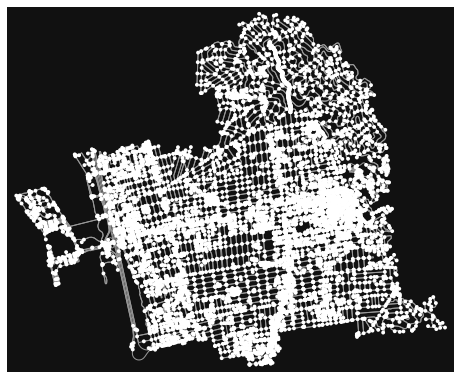

In [24]:
import networkx as nx
import osmnx as ox

# specify the location (city or address) you want to work with
place_name = "Berkeley, California, USA"

# download the street network data from OpenStreetMap
graph = ox.graph_from_place(place_name)

# plot the street network
fig, ax = ox.plot_graph(graph)
